In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [68]:
data=pd.read_csv(r"C:\Users\PRASAD\OneDrive\Documents\PNQ_AQI.csv")


In [81]:
# Convert the 'Date' column with dayfirst=True and allow errors to be coerced
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True, errors='coerce')

# Optionally, drop rows where the date conversion failed
data = data.dropna(subset=['Date'])

# Format the date column to string in "YYYY-MM-DD" format
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')

print(data['Date'].head())
print(data['Date'].dtype)

0    2009-01-01
1    2009-01-02
2    2009-01-03
3    2009-01-04
4    2009-01-07
Name: Date, dtype: object
object


In [126]:
data.sample(10)

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,SPM,CO2 µg/m3,AQI,Location
5605,2017-08-10,34,47,38.0,NaN,NaN,59.0,Karve Road
1542,2011-07-11,46,54,46.0,70.0,NaN,68.0,MPCB-SWGT
1594,2009-01-10,23,33,155.0,368.0,NaN,137.0,MPCB-BSRI
6990,2018-02-09,22,37,92.0,NaN,NaN,92.0,MPCB-KR
60,2009-03-11,21,22,106.0,NaN,NaN,104.0,MPCB-KR
6952,2018-01-02,23,46,89.0,NaN,NaN,89.0,MPCB-KR
564,2010-11-03,14,27,117.0,NaN,NaN,111.0,MPCB-KR
5711,2017-12-01,27,51,141.0,NaN,NaN,127.0,Karve Road
7654,2018-10-04,53,56,17.0,NaN,NaN,70.0,MPCB-PMPR
7513,2018-03-08,70,117,127.0,NaN,NaN,137.0,MPCB-PMPR


In [127]:
data['Nox µg/m3'] = pd.to_numeric(data['Nox µg/m3'], errors='coerce') # Convert the columns  'Nox µg/m3' to numeric



Date             0
SO2 µg/m3        0
Nox µg/m3       29
RSPM µg/m3       0
SPM           1201
CO2 µg/m3     1927
AQI              4
Location         0
dtype: int64

In [129]:
data.drop(columns=['CO2 µg/m3'], inplace=True)
data.drop(columns=['SPM'], inplace=True)


Date           0
SO2 µg/m3      0
Nox µg/m3     29
RSPM µg/m3     0
AQI            4
Location       0
dtype: int64

In [141]:
data['AQI'] = data['AQI'].fillna(data['AQI'].median())
data['Nox µg/m3'] = data['Nox µg/m3'].fillna(data['AQI'].median())


In [142]:
data.isnull().sum()

Date          0
SO2 µg/m3     0
Nox µg/m3     0
RSPM µg/m3    0
AQI           0
Location      0
dtype: int64

In [163]:
data.sample(5)


,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,AQI,Location
183,2009-08-02,BDL - 2,51.0,55.0,55.0,MPCB-KR
7537,2018-04-12,11,70.0,82.0,88.0,MPCB-PMPR
7262,2018-12-04,4,95.0,124.0,116.0,MPCB-KR
154,2009-07-01,BDL - 2,51.0,48.0,48.0,MPCB-KR
4868,2015-06-10,18,42.0,59.0,59.0,Karve Road


In [150]:
# Summary statistics for numerical columns
print(data.describe())


         Nox µg/m3   RSPM µg/m3          AQI
count  1927.000000  1927.000000  1927.000000
mean     57.583290   104.718734   105.326933
std      30.432964    59.139712    45.000277
min       9.000000     6.000000    19.000000
25%      37.000000    60.000000    72.500000
50%      51.000000    95.000000   104.000000
75%      72.000000   141.000000   134.000000
max     193.000000   680.000000   713.000000


In [152]:
print(data['SO2 µg/m3'].dtype)


object


In [153]:
print(data['SO2 µg/m3'].unique())


['15' '13' '8' '10' '14' 'BDL -\xa0NA' '12' '9' '25' '23' '22' '24' '21'
 '20' '19' '17' '18' '16' 'BDL -\xa02' '11' '35' '32' '6' '7' '4'
 'BDL -\xa03' '5' '60' '26' 'BDL -\xa01' '28' '29' '27' '33' '36' '30'
 '31' '44' '41' '39' '40' '45' '34' '37' '55' '48' '47' '53' '50' '64'
 '58' '49' '46' '59' '54' '51' '62' '63' '43' '70' '75' '83' '103' '42'
 '94' '67' '74' '95' '38' '61' '52' '57' '78' '136' '144' '525' '73' '56'
 '79' '102' '80' '71' '90' '72' '69' '68' '76']


In [166]:
#for numeric conversion of SO2
data['SO2 µg/m3'] = pd.to_numeric(data['SO2 µg/m3'].astype(str).str.strip().str.replace(r'[^\d.]', '', regex=True), errors='coerce')


In [167]:
print(data['SO2 µg/m3'].dtype)


float64


In [171]:
# Fill NaN values with the median of the column
data['SO2 µg/m3'] = data['SO2 µg/m3'].fillna(data['SO2 µg/m3'].median())

In [186]:
data.sample(5)

,Date,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,AQI,Location
5316,2016-10-11,28.0,123.0,74.0,143.0,Karve Road
5744,2015-02-02,16.0,87.0,93.0,107.0,Nal Stop
6987,2018-02-06,21.0,49.0,79.0,79.0,MPCB-KR
4890,2015-07-04,19.0,43.0,116.0,111.0,Karve Road
623,2011-01-05,14.0,54.0,239.0,193.0,MPCB-KR


# Exploratory Data Analysis (EDA):


In [189]:
data.describe()

,SO2 µg/m3,Nox µg/m3,RSPM µg/m3,AQI
count,1927.000000,1927.000000,1927.000000,1927.000000
mean,24.343539,57.583290,104.718734,105.326933
std,18.471029,30.432964,59.139712,45.000277
min,4.000000,9.000000,6.000000,19.000000
25%,14.000000,37.000000,60.000000,72.500000
50%,21.000000,51.000000,95.000000,104.000000
75%,30.000000,72.000000,141.000000,134.000000
max,525.000000,193.000000,680.000000,713.000000


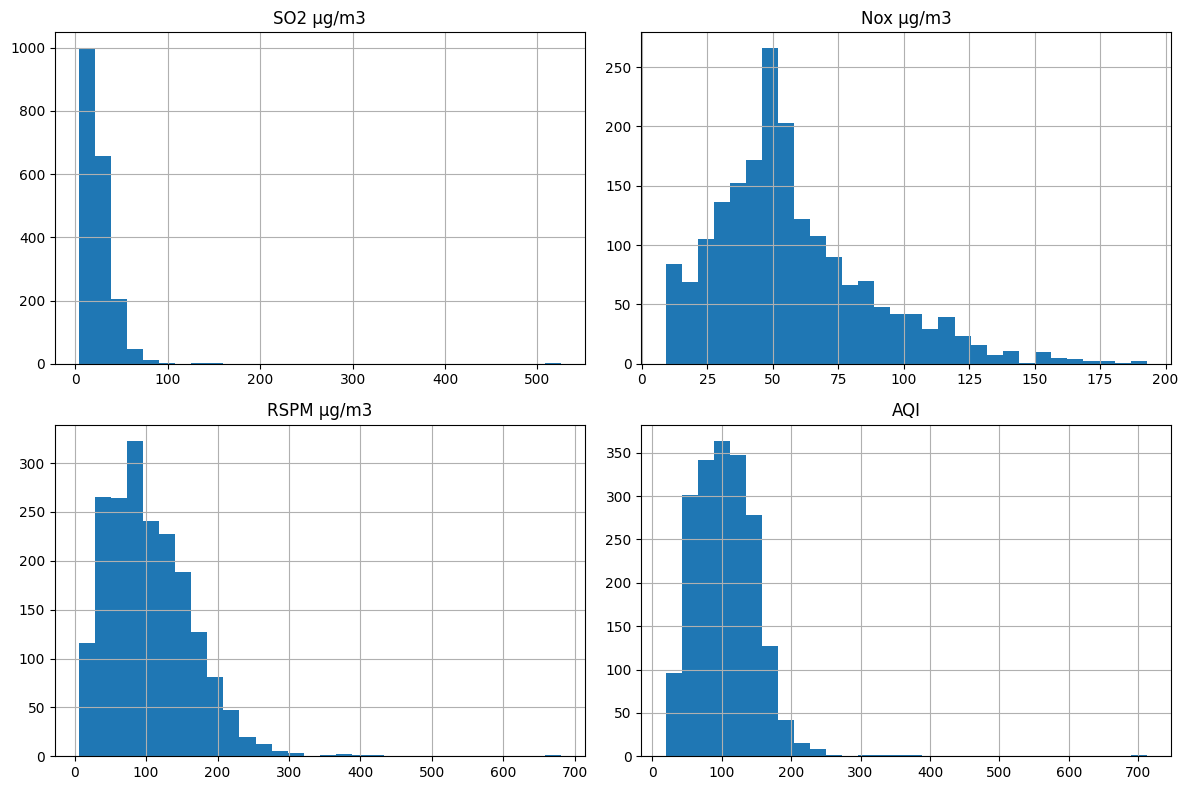

In [190]:
data[['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

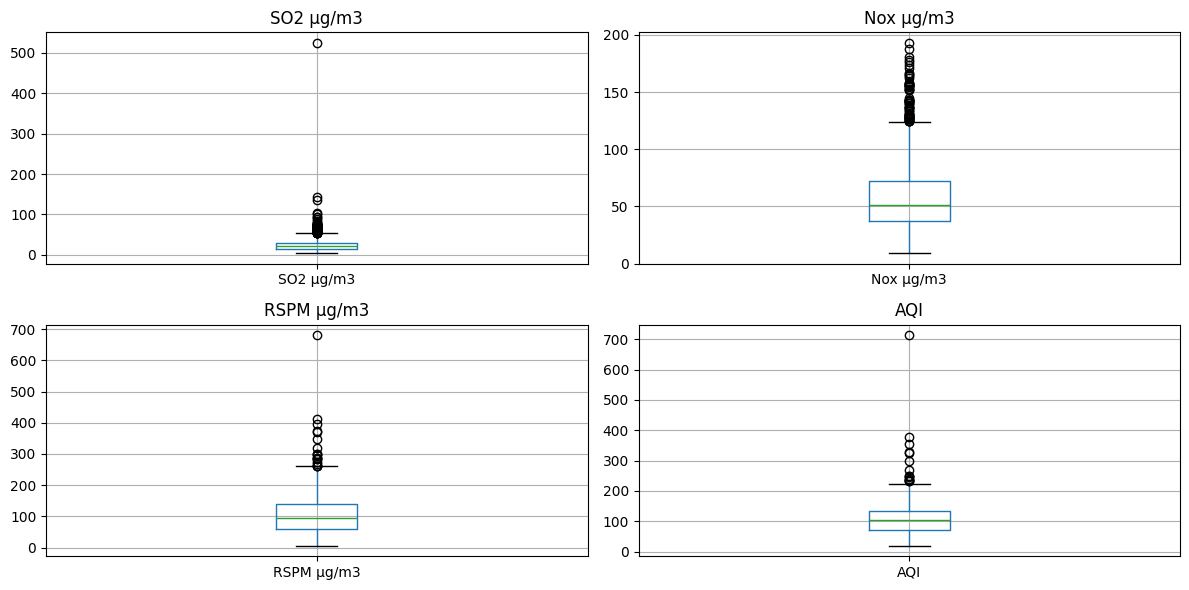

In [191]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']):
    plt.subplot(2, 2, i+1)
    data.boxplot(column=column)
    plt.title(column)
plt.tight_layout()
plt.show()


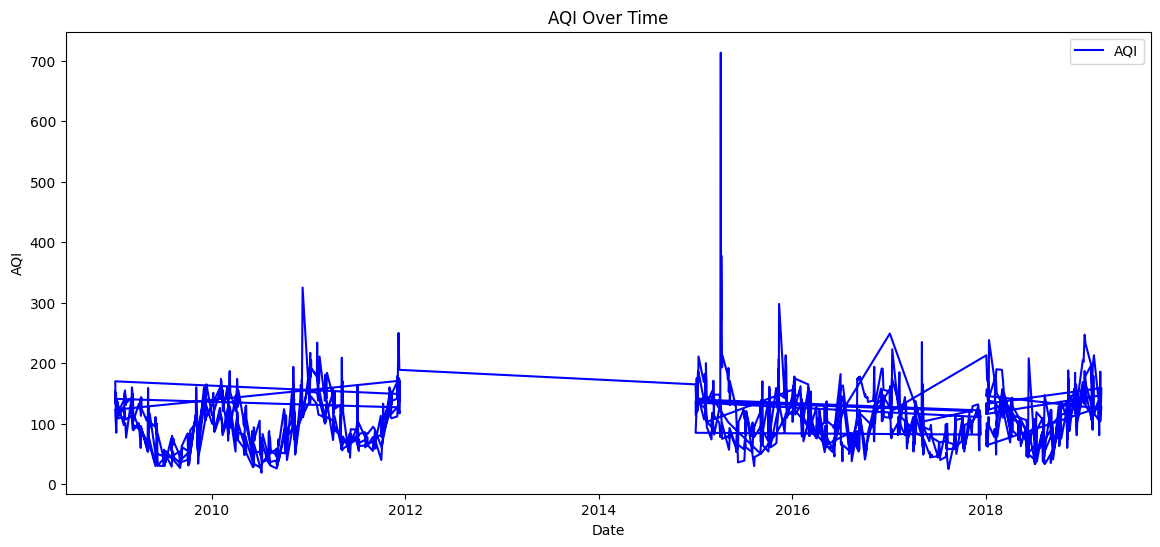

In [192]:
# Ensure 'Date' is in datetime format for plotting
data['Date'] = pd.to_datetime(data['Date'])

plt.figure(figsize=(14, 6))
plt.plot(data['Date'], data['AQI'], label='AQI', color='blue')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI Over Time')
plt.legend()
plt.show()


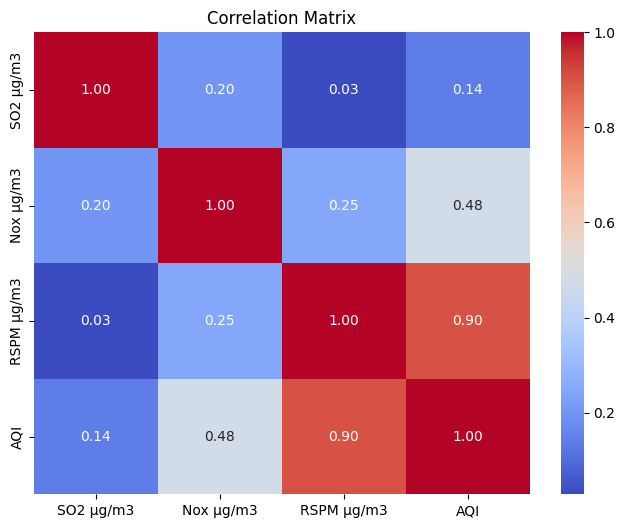

In [193]:
import seaborn as sns

corr_matrix = data[['SO2 µg/m3', 'Nox µg/m3', 'RSPM µg/m3', 'AQI']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()
